# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [136]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [137]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
#isdisjoint 代表 沒有交集
#not  X.isdisjoint(Y) 代表 有交集
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [138]:
#Z: "free" or "prize" appears in text.
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [139]:
#Y: spam
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [140]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

In [141]:
# P(y <= 1, z <= 0)
F_X_12([1,0])

0.9551328068916008

This is the JDF for this problem

In [142]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [143]:
F_X_12((1,0))

0.9551328068916008

In [144]:
# check whether Y and Z are independent or not
# 左式：P(y=0,z= 0)
# 右式：P(y=0,z<= 1), P(y<= 1,z<= 0)
# 右式：P(y=0), P(z= 0)
# False => dependent

F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [145]:
# P(y=0,z= 0)
F_X_12((0,0))

0.8575017946877244

In [146]:
# P(y=0) * P(z= 0)
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [147]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [148]:
#P(spam | "free" or "prize"  in text)
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [149]:
#P(spam)
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [150]:
x = np.random.normal(size=100)

In [151]:
np.mean(x)

-0.07870243791539774

In [152]:
g = lambda x: x**2

In [153]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

2.0424534568011588

## Moments etc

In [154]:
import numpy as np
x = np.random.normal(size=100)

In [155]:
x

array([-2.13005464e+00, -1.02913122e+00,  6.68728268e-01,  6.23414478e-01,
        2.87533273e-01, -2.04815766e-01,  6.41177744e-01,  2.55653349e+00,
       -5.20262084e-02, -2.77780018e-01, -2.81272522e-04,  1.93418460e+00,
       -4.85094794e-01,  8.68975899e-02, -9.82120727e-03, -2.75915965e-01,
        1.88708200e-01,  1.62586805e-01,  1.29984262e-01, -7.79424322e-01,
        1.53374182e+00,  4.20246719e-01, -2.12416248e+00, -8.98925979e-01,
       -4.09094314e-02,  4.75324012e-01, -2.30085018e+00,  2.77089745e-01,
       -1.59330659e-01, -1.06693570e+00,  6.89655403e-02,  7.74210797e-01,
       -5.71828627e-01, -1.86602901e-03,  3.24020126e-01, -4.86394104e-01,
       -1.94268223e-01,  6.44281748e-01,  1.21662920e+00,  4.43409349e-02,
       -9.50061626e-01, -2.06601093e+00,  3.70595408e-01, -7.59224912e-01,
       -1.94032822e+00,  1.96483198e+00,  1.11823207e+00, -1.75604735e-01,
       -1.14829649e+00, -1.79851528e-01, -6.59924333e-01,  1.01793597e+00,
        4.99485394e-01, -

## Sample mean

In [156]:
np.mean(x)

0.03598052184087285

## Sample variance

In [157]:
np.var(x)

1.0065840552540666

Or by doing it yourself

In [158]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

1.0065840552540666

Higher moments, we can use `scipy`

In [159]:
from scipy.stats import skew, kurtosis

In [160]:
skew(x)

0.05681878605563232

In [161]:
kurtosis(x,fisher=False)

3.4660903882681744

## Moments and tail behavior

In [162]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

4.0020027474800655


(-3.0, 5.0)

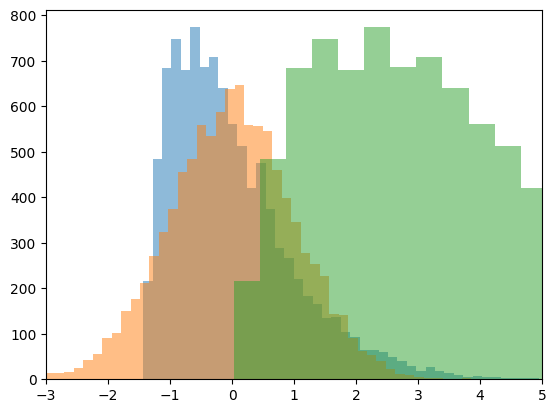

In [163]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
print(np.mean(chi2)) #mean:4
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5) #blue
_=plt.hist(standardize(normal),bins=50,alpha=0.5)#orange

_=plt.hist(chi2,bins=50,alpha=0.5) #green 未standarize chi2(4)
plt.xlim(-3,5)

In [164]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [165]:
print_basic_stats(standardize(normal))

mean: -0.00	std: 1.00	skew: -0.02	kurtosis: 3.00


In [166]:
print_basic_stats(standardize(chi2))

mean: -0.00	std: 1.00	skew: 1.28	kurtosis: 5.23


In [167]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: 0.00	std: 1.00	skew: 0.34	kurtosis: 2.91


In [168]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.2791725663016964

In [169]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

5.2260917219087375

## Transformations of random variables

Consider a Binomial random variable

In [170]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

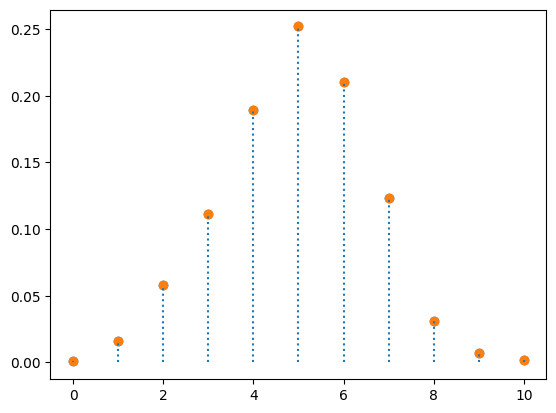

In [171]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

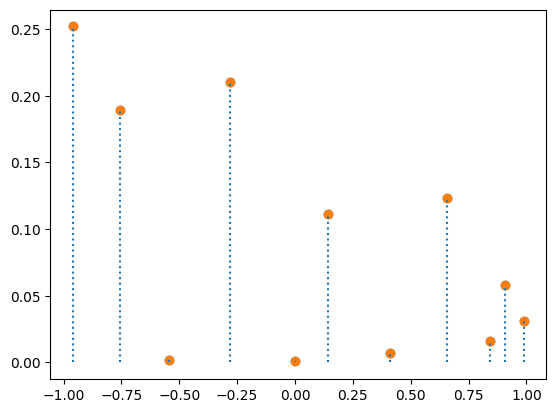

In [172]:
#simulation
plotEMF(makeEMF(np.sin(x)))

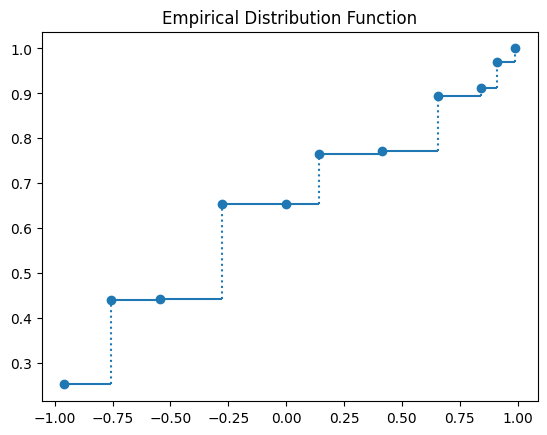

In [173]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [174]:
Y_space = np.sort(np.sin(np.arange(0,11)))
print(Y_space)
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))
print(sin_inv)

[-0.95892427 -0.7568025  -0.54402111 -0.2794155   0.          0.14112001
  0.41211849  0.6569866   0.84147098  0.90929743  0.98935825]
{0.0: 0, 0.8414709848078965: 1, 0.9092974268256817: 2, 0.1411200080598672: 3, -0.7568024953079283: 4, -0.9589242746631385: 5, -0.27941549819892586: 6, 0.6569865987187891: 7, 0.9893582466233818: 8, 0.4121184852417566: 9, -0.5440211108893698: 10}


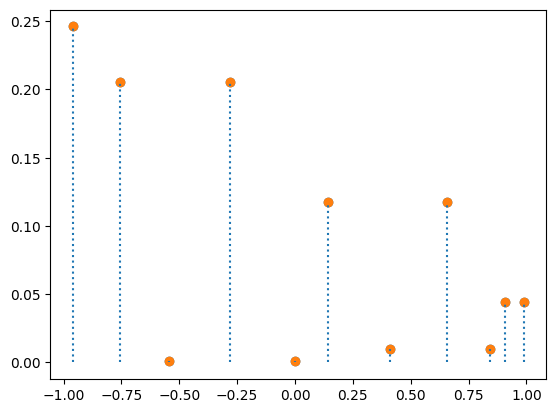

In [175]:
# real distribution using the pdf
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

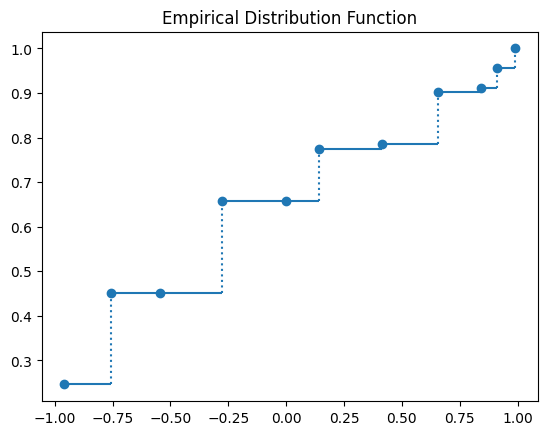

In [178]:
from Utils import emfToEdf
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))